In [2]:
import cv2
import numpy as np
from commonfunctions import *


In [45]:
image = cv2.imread("Dataset\\Vehicles\\0100.jpg")  # Load your image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale


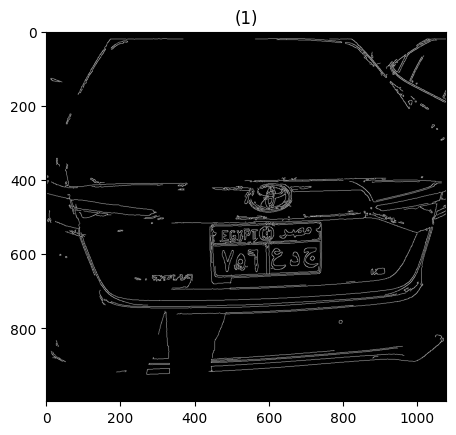

In [46]:

blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 30, 200)
show_images([edges])

In [47]:
import imutils

In [48]:
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]


In [49]:
license_plate = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    # if len(approx) == 4:  # Check if it’s a rectangle
    x, y, w, h = cv2.boundingRect(approx)
    aspect_ratio = w / float(h)
    # show_images([gray[y:y+h, x:x+w]])
        # if 2 < aspect_ratio < 6:  # Typical license plate aspect ratio
        #     license_plate = gray[y:y+h, x:x+w]
        #     break


In [50]:
if license_plate is not None:
    license_plate = cv2.adaptiveThreshold(license_plate, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


In [7]:
import cv2
import numpy as np

# Load the image
image = cv2.imread("Dataset\\Vehicles\\0001.jpg")  # Replace 'car.jpg' with your image file
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Preprocess the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # Reduce noise
edges = cv2.Canny(blurred, 100, 200)  # Perform edge detection

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]  # Keep largest contours

# Filter for license plate shape
license_plate = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:  # Look for rectangles
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = w / float(h)
        if 2 < aspect_ratio < 6:  # Check typical license plate aspect ratio
            license_plate = gray[y:y+h, x:x+w]
            break

# Enhance the license plate region
if license_plate is not None:
    license_plate = cv2.adaptiveThreshold(license_plate, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    show_images([license_plate])
else:
    print("License plate not found.")

License plate not found.
